# Machine Learning for Geospatial Data Workshop #1
*Geospatial Club -
Winter 2019*

## [Slides](http://bit.ly/geoml-1) and [Kernel](https://www.kaggle.com/jrmistry/uwgeo-club-ml-for-vector-geodata-workshop-1) for the first workshop on Machine Learning for [Vector data](https://www.kaggle.com/jrmistry/killed-or-seriously-injured-ksi-toronto-clean).

## [Slides](http://bit.ly/geoml-2) and [Kernel](https://www.kaggle.com/jcarrillo/machine-learning-for-geospatial-data-workshop-2a) for the second workshop on Machine Learning for [Raster data](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space).



The purpose of the workshop is to give the [UWaterloo](https://uwaterloo.ca/) students and the members of the [Geospatial Club](http://bit.ly/uwgeospatial) an introduction to the most recent Machine Learning tools for analysis of Geospatial data. The workshop is held in collaboration with the [Geospatial Centre at the University of Waterloo](https://uwaterloo.ca/library/geospatial/).

All of the software tools and libraries are open source. The dataset we use is a table titled "Killed or Seriously Injured" (KSI) from the [City of Toronto's Police Open Data portal](http://bit.ly/open-data-ksi-toronto). It contains registries of all traffic collisions between 2007 and 2017 where a person was injured or property damage was reported.

We hope that you will learn something new from the content of this workshop. If you have questions after the workshop, then please feel free to message the Geospatial Club or the workshop presenters.

* [Jaydeep Mistry](https://www.linkedin.com/in/jaydeep-mistry/) at jaydeep.mistry@uwaterloo.ca

* [Juan Carrillo](https://www.linkedin.com/in/jmcarrillog/) at jmcarril@uwaterloo.ca




### **Press CTRL+Enter to run each cell**
### Press SHIFT+Enter to run a cell and move onto the next cell

# Working with Python Libraries

https://www.python.org/

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Numpy Overview

Numpy is a Python library for linear algebra (matrices) calculations.

http://www.numpy.org/

In [2]:
data = np.array([['a','b','c'], [4,5,6], [True,False,None]])

In [3]:
data

array([['a', 'b', 'c'],
       [4, 5, 6],
       [True, False, None]], dtype=object)

# Pandas Overview

Pandas is a Python library for data preparation and analysis.

https://pandas.pydata.org/

In [4]:
df_data = pd.DataFrame(data)

In [5]:
df_data

,0,1,2
0,a,b,c
1,4,5,6
2,True,False,None


# Matplotlib Overview

Matplotlib is a Python library for data visualization.

https://matplotlib.org/

In [6]:
import matplotlib.pyplot as plt

In [7]:
df_emissions = pd.DataFrame(data = [[25, 30], [45, 25], [30, 45]],
                            index = [2011, 2012, 2013],
                            columns = ['Canada', 'USA'])

In [8]:
df_emissions

,Canada,USA
2011,25,30
2012,45,25
2013,30,45


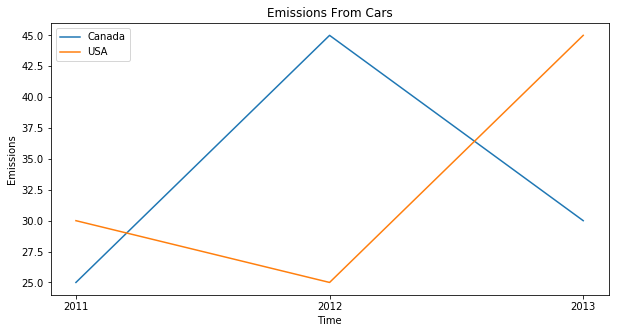

In [9]:
plt.figure(figsize=(10,5))
plt.plot(df_emissions)
plt.xticks(df_emissions.index)
plt.legend(df_emissions.columns)
plt.xlabel('Time')
plt.ylabel('Emissions')
plt.title('Emissions From Cars')

plt.show()

# Folium Overview

Folium is a Python library for visualizing geospatial data, in fact it, uses Leaflet under the hood.

* http://python-visualization.github.io/folium/

* https://leafletjs.com/

In [10]:
import folium

In [11]:
data = (
    # Matrix of size 70 by 3, filled with numbers 
    # between -1 and 1 following a normal distribution
    np.random.normal(size=(70, 3)) *
    # Matrix of size 3 by 1, to scale values in the previous matrix
    np.array([[0.01, 0.01, 1]]) +
    # Matrix of size 3 by 1, with coordiates of University of Waterloo
    np.array([[43.471257, -80.543021, 1]])
).tolist()

In [12]:
# format of data: [latitude, longitude, weight]
data[0:3]

[[43.477700681787226, -80.55914223371971, 0.9482984308451783],
 [43.47503230015702, -80.54282361968076, 0.6101789612810646],
 [43.47433523790503, -80.53753146097546, -0.09431079216106242]]

In [13]:
from folium.plugins import HeatMap

map_demo = folium.Map([43.471257, -80.543021],
                      #tiles='Stamen Toner',
                      zoom_start=14)
HeatMap(data).add_to(map_demo)

map_demo

# Loading Data
 [Killed or Seriously Injured (KSI) from 2007 – 2017](http://bit.ly/open-data-ksi-toronto)

In [14]:
# Importing OS is typically used for reading and writing from files
import os
# Print contents in the input folder
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['KSI_CLEAN.csv']


In [15]:
# Pandas for data importing
df_ksi = pd.read_csv('../input/KSI_CLEAN.csv')

# Data Exploration

In [16]:
# the info() function writes down descriptive information about the dataset such as:
#  - Number of rows
#  - Attribute names, here each attribute is represented as a column of data
#  - Data types of attributes
#  - Order of attributes

df_ksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 56 columns):
ACCNUM           12557 non-null int64
YEAR             12557 non-null int64
MONTH            12557 non-null int64
DAY              12557 non-null int64
HOUR             12557 non-null int64
MINUTES          12557 non-null int64
WEEKDAY          12557 non-null int64
LATITUDE         12557 non-null float64
LONGITUDE        12557 non-null float64
Ward_Name        12557 non-null object
Ward_ID          12557 non-null int64
Hood_Name        12557 non-null object
Hood_ID          12557 non-null int64
Division         12557 non-null object
District         12557 non-null object
STREET1          12557 non-null object
STREET2          12557 non-null object
OFFSET           12557 non-null object
ROAD_CLASS       12557 non-null object
LOCCOORD         12557 non-null object
ACCLOC           12557 non-null object
TRAFFCTL         12557 non-null object
VISIBILITY       12557 non-null object
L

## Attribute names 

In [17]:
# write down just the column names of dataset
print(df_ksi.columns)

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID',
       'Division', 'District', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'FATAL'],
      dtype='object')


In [18]:
# Shortlist of the numerical attributes
ksi_numerical = ['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY', 
                 'LATITUDE', 'LONGITUDE', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 
                 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 
                 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'FATAL']

In [19]:
# Shortlist of the categorical attributes
ksi_categorical = ['Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID', 'Division', 
                   'District', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS', 
                   'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 
                   'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 
                   'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 
                   'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 
                   'CYCACT', 'CYCCOND']

In [20]:
# Shortlist of the geographic attributes
ksi_geographical = ['LATITUDE', 'LONGITUDE', 'Ward_Name', 'Hood_Name', 'District',
                   'Division', 'STREET1', 'STREET2']

In [21]:
# Shortlist of the Boolean attributes
ksi_boolean = ['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 
               'TRSN_CITY_VEH','EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 
               'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'FATAL']

In [22]:
df_ksi.head(3)

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,Ward_ID,Hood_Name,Hood_ID,Division,District,STREET1,STREET2,OFFSET,ROAD_CLASS,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
0,1249781,2011,8,4,23,18,3,43.651545,-79.383490,Toronto Centre-Rosedale (27),27,Bay Street Corridor (76),76,D52,Toronto East York,QUEEN ST W,YORK ST,,Major Arterial,Mid-Block,,No Control,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,50 to 54,None,0,West,Municipal Transit Bus (TTC),Going Ahead,Driving Properly,Normal,,,,,,,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),40,Tam O'Shanter-Sullivan (118),118,D42,Scarborough,SHEPPARD AVE E,AMETHYST RD,,Major Arterial,Intersection,,No Control,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,Passenger,25 to 29,Minimal,0,,Other,,,,,,,,,,1,0,1,0,0,0,0,1,1,1,0,0,0,0
2,5002235651,2015,12,30,23,39,2,43.682342,-79.328266,Toronto-Danforth (30),30,Greenwood-Coxwell (65),65,D55,Toronto East York,DANFORTH AVE,GILLARD AVE,,Major Arterial,Intersection,At Intersection,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,Pedestrian,60 to 64,Fatal,64,South,,,,,Vehicle is going straight thru inter.while ped...,"Crossing, no Traffic Control",Normal,,,,1,0,1,0,0,0,0,0,0,1,0,0,0,1


In [23]:
df_ksi.tail(3)

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,Ward_ID,Hood_Name,Hood_ID,Division,District,STREET1,STREET2,OFFSET,ROAD_CLASS,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
12554,1291534,2012,3,2,18,12,4,43.663245,-79.36759,Toronto Centre-Rosedale (28),28,Moss Park (73),73,D51,Toronto East York,PARLIAMENT ST,SPRUCE ST,,Minor Arterial,Intersection,,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,Pedestrian,30 to 34,Minimal,0,East,Other,,,,Pedestrian hit at mid-block,Walking on Roadway with Traffic,Normal,,,,1,0,0,1,0,0,0,0,1,1,0,0,0,0
12555,6001157650,2016,7,2,18,12,5,43.645874,-79.36343,Toronto Centre-Rosedale (28),28,Waterfront Communities-The Island (77),77,D51,Toronto East York,QUEENS QUAY E,BONNYCASTLE ST,65.6 M E of,Minor Arterial,Mid-Block,Non Intersection,No Control,Clear,Daylight,Dry,Fatal,SMV Other,Passenger,35 to 39,Fatal,45,,,,,,,,,,,,0,0,1,0,0,0,0,1,1,1,0,0,0,1
12556,6001157650,2016,7,2,18,12,5,43.645874,-79.36343,Toronto Centre-Rosedale (28),28,Waterfront Communities-The Island (77),77,D51,Toronto East York,QUEENS QUAY E,BONNYCASTLE ST,65.6 M E of,Minor Arterial,Mid-Block,Non Intersection,No Control,Clear,Daylight,Dry,Fatal,SMV Other,Driver,30 to 34,Major,0,East,"Automobile, Station Wagon",Going Ahead,Exceeding Speed Limit,Inattentive,,,,,,,0,0,1,0,0,0,0,1,1,1,0,0,0,1


## Data Cleaning

In [24]:
# Remove incidents which are listed as property damage
# in order to keep only Fatal and Non-Fatal injuries

print("KSI number of rows: ", len(df_ksi))

df_ksi = df_ksi[df_ksi['ACCLASS'] != 'Property Damage Only']

print("KSI number of rows: ", len(df_ksi))

KSI number of rows:  12557
KSI number of rows:  12545


In [25]:
df_ksi.sample(3)

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,Ward_ID,Hood_Name,Hood_ID,Division,District,STREET1,STREET2,OFFSET,ROAD_CLASS,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
4983,1300266,2012,4,28,13,52,5,43.657045,-79.37459,Toronto Centre-Rosedale (27),27,Church-Yonge Corridor (75),75,D51,Toronto East York,JARVIS ST,DUNDAS ST E,,Major Arterial,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,35 to 39,None,0,South,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,,,,,,,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2244,1260139,2011,8,23,10,50,1,43.772145,-79.25149,Scarborough Centre (38),38,Woburn (137),137,D43,Scarborough,ELLESMERE RD,MCCOWAN RD,,Major Arterial,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Angle,Driver,60 to 64,Minimal,0,East,"Automobile, Station Wagon",Going Ahead,Driving Properly,Normal,,,,,,,0,0,1,0,0,0,0,1,0,1,1,0,1,0
1637,1190299,2010,9,20,10,8,0,43.789145,-79.37329,Don Valley East (33),33,Bayview Village (52),52,D33,North York,PINEWAY BLVD,FINCH AVE E,,Major Arterial,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,30 to 34,None,0,South,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Normal,,,,,,,1,0,1,0,0,0,0,0,0,1,0,0,0,0


## Plotting Numerical Data

In [26]:
print("Numerical Attributes: \n", str(ksi_numerical))

Numerical Attributes: 
 ['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY', 'LATITUDE', 'LONGITUDE', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'FATAL']


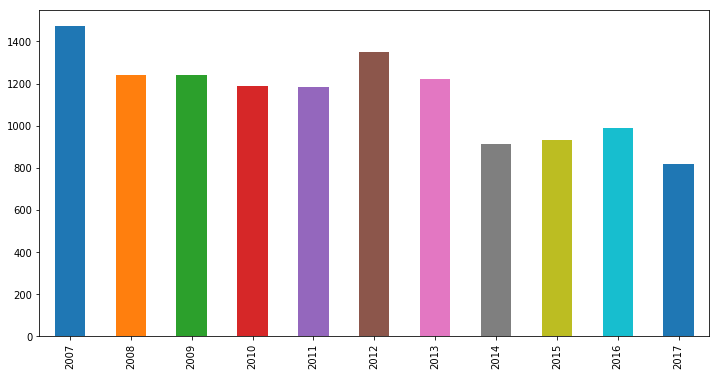

In [27]:
# Learning Exercise
# Try changing the attribute with another numerical attribute listed above:
attribute = 'YEAR'

plt.figure(figsize=(12,6))
data = df_ksi[attribute].value_counts().sort_index()
data.plot(kind='bar')
plt.show()

## Plotting Categorical data

In [28]:
print("Categorical Attributes: \n", str(ksi_categorical))

Categorical Attributes: 
 ['Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID', 'Division', 'District', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND']


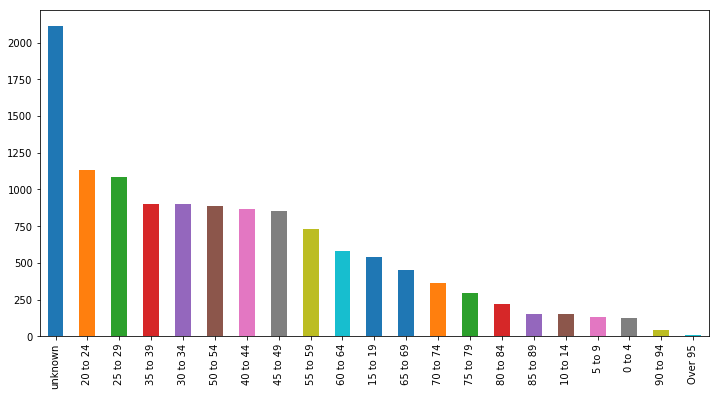

In [29]:
# Learning Exercise
# Try changing the attribute with another categorical attribute listed above:
# INVAGE is "Age of Involved Party"
attribute = 'INVAGE'

plt.figure(figsize=(12,6))
data = df_ksi[attribute].value_counts()
data.plot(kind='bar')
plt.show()

## Working with Aggregrate Statistics

In [30]:
print(ksi_boolean)

['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'FATAL']


In [31]:
# Learning Exercise
# Change the attribute below to calculate what percentage of incidents
# reported th involvemnt of possible items listed above
attribute = 'AUTOMOBILE'

print("Percentage of incidents that involve", attribute, "=", df_ksi[attribute].sum() / df_ksi[attribute].count())

Percentage of incidents that involve AUTOMOBILE = 0.9055400557991231


In [32]:
# Summary statistics, for simplicity
# we run it over all attributes,
# but they only make sense for numeric
df_ksi.describe()

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_ID,Hood_ID,FATAL_NO,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
count,1.254500e+04,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000,12545.000000
mean,1.571897e+09,2011.542925,6.764368,15.650379,13.176644,28.239697,2.985492,43.710713,-79.396035,22.562535,73.591152,1.253567,0.398565,0.107214,0.905540,0.078119,0.063452,0.064966,0.001196,0.368912,0.174173,0.510881,0.084018,0.043204,0.028378,0.136788
std,2.537308e+09,3.101559,3.278275,8.861860,6.236238,17.518918,1.964151,0.056015,0.104202,12.531908,41.331108,6.963029,0.489622,0.309397,0.292479,0.268369,0.243783,0.246476,0.034560,0.482529,0.379273,0.499902,0.277425,0.203325,0.166056,0.343637
min,1.284070e+05,2007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,43.592048,-79.638390,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.108205e+06,2009.000000,4.000000,8.000000,9.000000,13.000000,1.000000,43.662645,-79.467434,12.000000,38.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.275736e+06,2011.000000,7.000000,16.000000,14.000000,30.000000,3.000000,43.702345,-79.396450,23.000000,77.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.002339e+09,2014.000000,10.000000,23.000000,18.000000,44.000000,5.000000,43.755992,-79.318090,34.000000,111.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7.003292e+09,2017.000000,12.000000,31.000000,23.000000,59.000000,6.000000,43.855445,-79.125897,44.000000,140.000000,77.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Summary statistics aggregated by month
df_ksi_monthly = df_ksi.groupby(by=['YEAR', 'MONTH'],as_index=False).sum()

# Show only the last 10 rows
df_ksi_monthly.tail(10)

,YEAR,MONTH,ACCNUM,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_ID,Hood_ID,FATAL_NO,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
122,2017,3,385026646063,994,582,1681,181,2405.881462,-4364.655111,1514,5136,60,13,6,53,0,0,2,0,26,20,36,20,2,4,14
123,2017,4,441041185600,850,841,1592,185,2754.119269,-5004.149088,1084,3691,105,37,2,54,3,4,4,0,21,19,34,0,0,0,12
124,2017,5,700087331974,1743,1458,3237,341,4372.383926,-7934.930436,2757,9061,115,25,17,92,11,3,2,0,52,14,47,9,4,4,12
125,2017,6,581088900536,1292,1201,1509,219,3627.606029,-6589.651996,1923,6053,81,21,18,74,20,4,12,0,39,12,30,0,0,4,8
126,2017,7,504092414138,1230,1068,2176,216,3147.952434,-5717.389648,1571,4791,155,26,6,59,24,4,9,0,39,8,22,0,2,0,14
127,2017,8,623132610617,1558,1224,2344,214,3891.465471,-7067.014574,1905,5926,219,29,10,87,8,0,11,0,34,12,48,0,4,1,11
128,2017,9,455110488083,1217,976,1817,194,2841.074606,-5161.158662,1434,5269,301,29,14,61,8,9,0,0,22,13,24,4,4,7,18
129,2017,10,581153482079,991,1238,1872,216,3628.687772,-6588.683656,1988,6562,245,39,18,72,12,4,6,0,27,15,42,10,0,0,13
130,2017,11,427337858381,1073,820,1650,183,2711.253705,-4922.590912,1410,4575,271,40,6,56,0,2,4,0,17,4,31,0,0,0,8
131,2017,12,329150524385,722,633,1579,107,2054.480385,-3730.934695,1218,3579,412,33,2,40,2,2,3,0,18,10,23,7,2,0,13


## Seaborn
Seaborn is another visualization library similar to matplotlib. https://seaborn.pydata.org/

In [34]:
import seaborn as sns

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


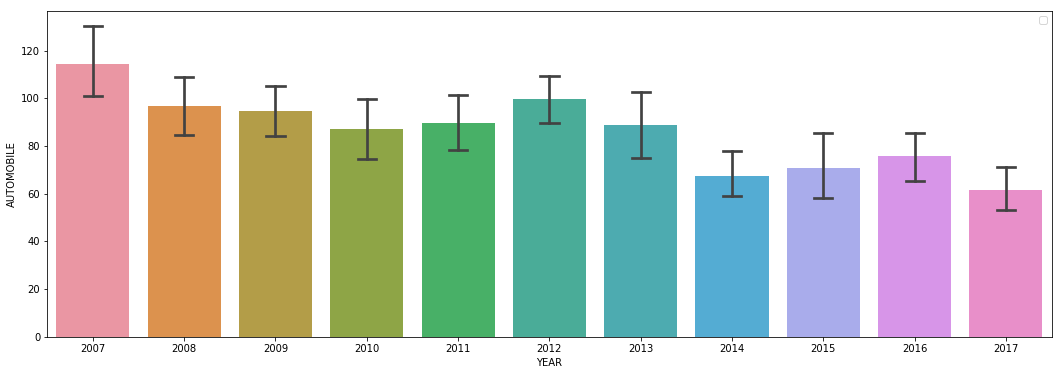

In [35]:
# Learning Exercise

# Try changing the independent (x) and dependent (y) 
# variables to visualize the trends in the data
# (optional: uncomment the Hue and see how that changes the plot)

plt.figure(figsize=(18,6))

sns.barplot(data = df_ksi_monthly,
            #hue = 'MONTH',
            x = 'YEAR',
            # Number of events involving automobiles
            y = 'AUTOMOBILE',
            capsize = 0.2)

# Legend Placement
plt.legend(loc='best')
#plt.legend(loc='upper right')
#plt.legend(loc='upper left')

plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


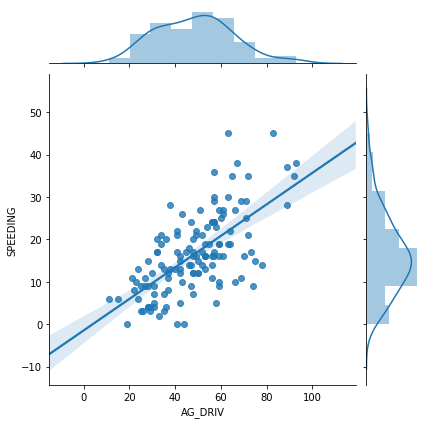

In [36]:
# Learning Exercise
# Try changing the independent (x) and dependent (y) 
# variables to visualize the trends in the data

sns.jointplot(data = df_ksi_monthly,
              kind = 'reg',
              x = 'AG_DRIV', # Aggressive and Distracted Driving Collision
              y = 'SPEEDING') # Speeding Related Collision
plt.show()

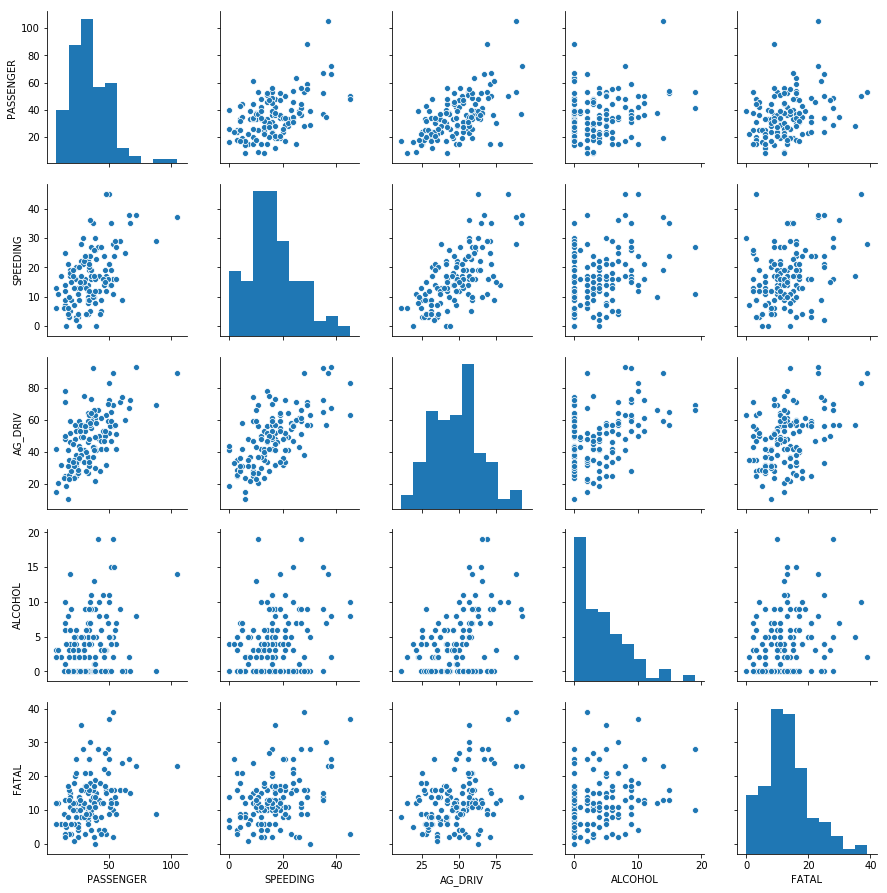

In [37]:
# More correlations between attributes accumulated by month

# PASSENGER Passenger Involved in Collision
# SPEEDING Speeding Related Collision
# AG_DRIV Aggressive and Distracted Driving Collision
# ALCOHOL Alcohol Related Collision
# FATAL Fatal event

sns.pairplot(df_ksi_monthly[['PASSENGER','SPEEDING','AG_DRIV','ALCOHOL','FATAL']])
plt.show()

## Plotting Time-Series Numerical Data

In [38]:
data = df_ksi_monthly.pivot('MONTH','YEAR','FATAL')
data

YEAR,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
MONTH,,,,,,,,,,,
1,3,15,4,28,11,14,10,6,5,22,12
2,14,16,5,16,3,3,6,8,8,12,6
3,19,6,13,11,6,2,15,1,16,12,14
4,13,7,10,4,2,12,18,2,9,16,12
5,2,30,8,10,0,12,9,12,16,17,12
6,25,16,11,9,8,4,4,3,16,16,8
7,23,28,8,28,16,15,35,14,9,21,14
8,16,10,6,3,37,11,39,24,14,15,11
9,23,13,11,17,12,13,21,10,27,14,18


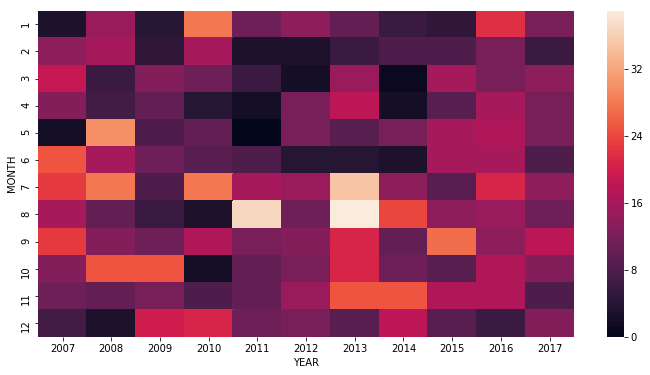

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(data)
plt.show()

## Plotting Geographic Data

In [40]:
print("Geographic Attributes: \n", str(ksi_geographical))

Geographic Attributes: 
 ['LATITUDE', 'LONGITUDE', 'Ward_Name', 'Hood_Name', 'District', 'Division', 'STREET1', 'STREET2']


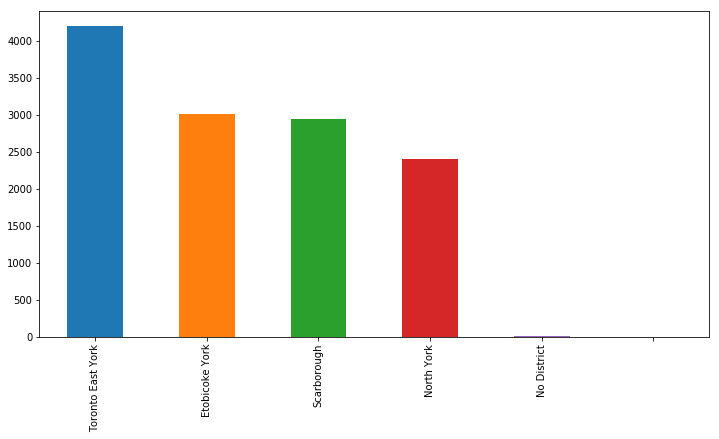

In [41]:
# Learning Exercise
# Try changing the geographic attribute with another attribute listed above:
attribute = 'District'

plt.figure(figsize=(12,6))
data = df_ksi[attribute].value_counts().head(12)
data.plot(kind='bar')
plt.show()

In [42]:
df_ksi_geo = df_ksi[df_ksi['FATAL'] == 1]
df_ksi_geo = df_ksi_geo[['LATITUDE', 'LONGITUDE', 'FATAL']].sample(1000)
df_ksi_geo.sample(3)

,LATITUDE,LONGITUDE,FATAL
10364,43.680725,-79.382404,1
7197,43.727844,-79.417889,1
1628,43.667644,-79.342793,1


In [43]:
lat_Toronto = df_ksi.describe().at['mean','LATITUDE']
lng_Toronto = df_ksi.describe().at['mean','LONGITUDE']

In [44]:
# Heatmap of fatal events
map_ksi_fatal = folium.Map(location = [lat_Toronto, lng_Toronto],
                           #tiles = 'Stamen Toner', # uncomment this code to change basemap
                           zoom_start = 11)

HeatMap(df_ksi_geo.values, min_opacity =0.4).add_to(map_ksi_fatal)
map_ksi_fatal

## Correlation Analysis

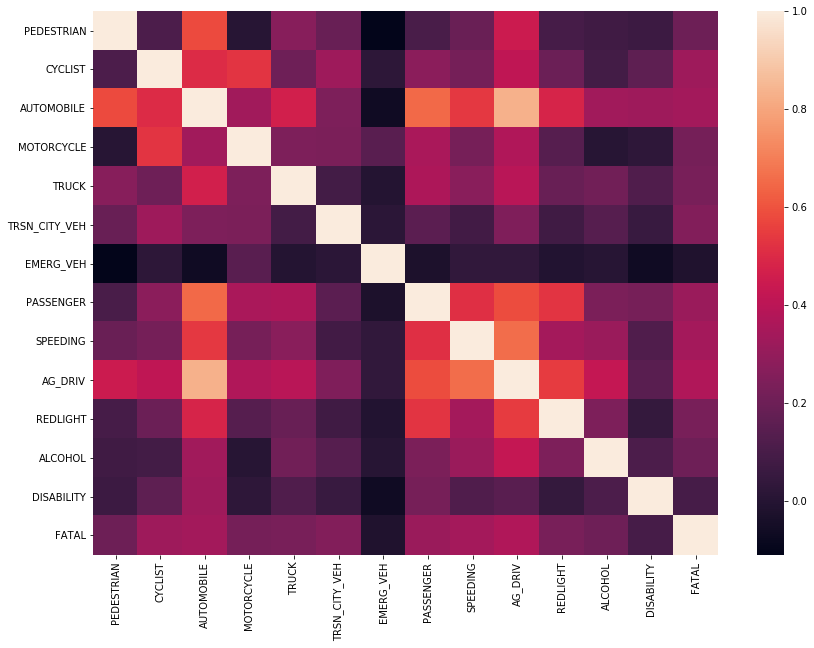

In [45]:
# Below we are visualizing the correlation of the attributes.
#  - If the correlation for two attributes is closer to positive one, 
#    they are positively correlated, meaning that if the value for one increases, 
#    the other is expected to increase as well.
#  - If the correlation for two attributes is close to negative one, 
#    they are negatively correlated, meaning that if the value for one increases, 
#    the other is expected to decrease as well.
#  - If the correlation is close to zero, there is likely no correlation.

plt.figure(figsize=(14,10))
sns.heatmap(df_ksi_monthly[ksi_boolean].corr())
plt.show()

# Machine Learning for predicting fatal events
Scikit-learn is one of the most popular Machine Learning libraries written in Python.

https://scikit-learn.org/

## Train/Test Splitting

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# the function below takes in the dataset, and a list of input columns names 
# as model input and a column name to predict for.
def split_train_test(data, X, y):
    X_all = data[X]
    y_all = data[y]
    
    X_train, X_test, y_train, y_test = train_test_split(X_all,
                                                        y_all,
                                                        test_size=0.4,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Descision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
# Learning Exercise:
# Try changing the variables of the model and see how the model accuracy changes!
model_input = ['YEAR','MONTH','WEEKDAY','Hood_ID']
model_output = 'FATAL'

X_train, X_test, y_train, y_test = split_train_test(data = df_ksi,
                                                    X = model_input,
                                                    y = model_output)

In [51]:
dtree = DecisionTreeClassifier()

In [52]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
predictions = dtree.predict(X_test)

In [54]:
# The confusion matrix shows the proportion of incidents predicted correctly, and incorrectly

print(confusion_matrix(y_test, predictions))

[[4191  156]
 [ 136  535]]


In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4347
           1       0.77      0.80      0.79       671

   micro avg       0.94      0.94      0.94      5018
   macro avg       0.87      0.88      0.88      5018
weighted avg       0.94      0.94      0.94      5018



In [56]:
accuracy_score(y_test, predictions)

0.9418094858509366

## Visualizing the Decision Tree

In [57]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

dot_data = StringIO()

In [58]:
def draw_decision_tree(tree):
    export_graphviz(tree,
                    out_file=dot_data,
                    feature_names = X_train.columns,
                    filled = True,
                    rounded = True)
    
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    
    return Image(graph[0].create_png())

In [59]:
# NOTE: Depending on your device performance, you may not want to
#       run the command below because it computationally intensive

# Running the command below will draw the entire descision tree!
# You can copy the image and paste it in Microsoft Paint or another image viewer and see the decision paths.

#draw_decision_tree(dtree)

## Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
# Learning Exercise:
# Try changing the variables of the model and see how the model accuracy changes!
model_input = ['YEAR','MONTH','WEEKDAY','Hood_ID']
model_output = 'FATAL'

X_train, X_test, y_train, y_test = split_train_test(data = df_ksi,
                                                    X = model_input,
                                                    y = model_output)

In [62]:
model_input = ['YEAR','MONTH','WEEKDAY','LATITUDE','LONGITUDE']
model_output = 'FATAL'

X_train, X_test, y_train, y_test = split_train_test(data = df_ksi,
                                                    X = model_input,
                                                    y = model_output)

In [63]:
rfc = RandomForestClassifier(n_estimators = 200)

In [64]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
predictions = rfc.predict(X_test)

In [66]:
print(confusion_matrix(y_test, predictions))

[[4331   16]
 [ 133  538]]


In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4347
           1       0.97      0.80      0.88       671

   micro avg       0.97      0.97      0.97      5018
   macro avg       0.97      0.90      0.93      5018
weighted avg       0.97      0.97      0.97      5018



In [68]:
accuracy_score(y_test, predictions)

0.9703068951773615

In [69]:
print("Number of Descision Trees  our Random Forest Model contains: ", len(rfc.estimators_))

Number of Descision Trees  our Random Forest Model contains:  200


In [70]:
# NOTE: Depending on your device performance, you may want to
#       run the command below because it is resource intensive

# Running the command below will draw the entire descision tree!
# You can copy the image and paste it in Microsoft Paint or another image viewer and see the decision paths.

#draw_decision_tree(rfc.estimators_[5])